In [1]:
from processor import Processor
from splitter import DataSplitter
from mlmodel import MLModel
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier




In [2]:
# load the datas
Processor = Processor(filepath="../data/balanced_data.csv")
Processor.load_data()
Processor.show_features()

Dataset loaded successfully.
Features in the dataset:
1. Flow ID
2. SrcIP
3. DstIP
4. SrcPort
5. DstPort
6. Protocol
7. mTimestampStart
8. mTimestampLast
9. Flow Duration
10. Flow Bytes/s
11. Flow Packets/s
12. Tot Fwd Pkts
13. Tot Bwd Pkts
14. Total Length of Fwd Packet
15. Total Length of Bwd Packet
16. Fwd Packet Length Min
17. Fwd Packet Length Max
18. Fwd Packet Length Mean
19. Fwd Packet Length Std
20. Bwd Packet Length Min
21. Bwd Packet Length Max
22. Bwd Packet Length Mean
23. Bwd Packet Length Std
24. Flow IAT Mean
25. Flow IAT Min
26. Flow IAT Max
27. Flow IAT Stddev
28. Fwd IAT Min
29. Fwd IAT Max
30. Fwd IAT Mean
31. Fwd IAT Std
32. Fwd IAT Tot
33. Bwd IAT Min
34. Bwd IAT Max
35. Bwd IAT Mean
36. Bwd IAT Std
37. Bwd IAT Tot
38. Fwd PSH flags
39. Bwd PSH flags
40. Fwd URG flags
41. Bwd URG flags
42. Fwd Header Length
43. Bwd Header Length
44. Fwd Packets/s
45. Bwd Packets/s
46. Packet Length Min
47. Packet Length Max
48. Packet Length Mean
49. Packet Length Std
50. Packet L

In [3]:
# columns to drop

columns_to_drop = ['Flow ID', 'SrcIP', 'DstIP', 'External_src', 'External_dst', 'Conn_state', 'Segment_src',
                    'Segment_dst', 'Expoid_src', 'Expoid_dst', 'mTimestampStart', 'mTimestampLast']




In [4]:
Processor.drop_features(columns_to_drop = columns_to_drop)
Processor.show_features()

Successfully dropped the following columns: Conn_state, Segment_dst, DstIP, mTimestampLast, Expoid_src, Segment_src, SrcIP, Flow ID, mTimestampStart, Expoid_dst, External_dst, External_src
Features in the dataset:
1. SrcPort
2. DstPort
3. Protocol
4. Flow Duration
5. Flow Bytes/s
6. Flow Packets/s
7. Tot Fwd Pkts
8. Tot Bwd Pkts
9. Total Length of Fwd Packet
10. Total Length of Bwd Packet
11. Fwd Packet Length Min
12. Fwd Packet Length Max
13. Fwd Packet Length Mean
14. Fwd Packet Length Std
15. Bwd Packet Length Min
16. Bwd Packet Length Max
17. Bwd Packet Length Mean
18. Bwd Packet Length Std
19. Flow IAT Mean
20. Flow IAT Min
21. Flow IAT Max
22. Flow IAT Stddev
23. Fwd IAT Min
24. Fwd IAT Max
25. Fwd IAT Mean
26. Fwd IAT Std
27. Fwd IAT Tot
28. Bwd IAT Min
29. Bwd IAT Max
30. Bwd IAT Mean
31. Bwd IAT Std
32. Bwd IAT Tot
33. Fwd PSH flags
34. Bwd PSH flags
35. Fwd URG flags
36. Bwd URG flags
37. Fwd Header Length
38. Bwd Header Length
39. Fwd Packets/s
40. Bwd Packets/s
41. Packet L

In [5]:
# extract the target
Processor.extract_target(target_column='Label')
print(Processor.y.value_counts())
Processor.show_features()

Target column 'Label' extracted successfully and stored in self.y.
Label
1    1644599
0    1644599
Name: count, dtype: int64
Features in the dataset:
1. SrcPort
2. DstPort
3. Protocol
4. Flow Duration
5. Flow Bytes/s
6. Flow Packets/s
7. Tot Fwd Pkts
8. Tot Bwd Pkts
9. Total Length of Fwd Packet
10. Total Length of Bwd Packet
11. Fwd Packet Length Min
12. Fwd Packet Length Max
13. Fwd Packet Length Mean
14. Fwd Packet Length Std
15. Bwd Packet Length Min
16. Bwd Packet Length Max
17. Bwd Packet Length Mean
18. Bwd Packet Length Std
19. Flow IAT Mean
20. Flow IAT Min
21. Flow IAT Max
22. Flow IAT Stddev
23. Fwd IAT Min
24. Fwd IAT Max
25. Fwd IAT Mean
26. Fwd IAT Std
27. Fwd IAT Tot
28. Bwd IAT Min
29. Bwd IAT Max
30. Bwd IAT Mean
31. Bwd IAT Std
32. Bwd IAT Tot
33. Fwd PSH flags
34. Bwd PSH flags
35. Fwd URG flags
36. Bwd URG flags
37. Fwd Header Length
38. Bwd Header Length
39. Fwd Packets/s
40. Bwd Packets/s
41. Packet Length Min
42. Packet Length Max
43. Packet Length Mean
44. Packe

In [6]:
# solve and encode categorical datas
Processor.detect_categorical(handle_nan="drop")
Processor.encode_categorical(method="label")

Categorical Features and their NaN Information:
- Service:
  NaN Count: 1384681
  Percentage of NaNs: 42.10%
  Action: Dropped rows with NaN in 'Service'.

Categorical NaN handling completed.
Encoding categorical features using label encoding.
Feature 'Service' encoded using Label Encoding.
Categorical encoding completed.


In [7]:
# drop duplicated lines in the code
Processor.handle_duplicates()
print(Processor.y.value_counts())

Found 132596 duplicate rows in the dataset.
Duplicate rows have been removed.
Label
0    909971
1    861950
Name: count, dtype: int64


In [8]:
# detect numerical issues and treat the datas and drop them
num_issue_features = Processor.detect_missing_numerical()
Processor.handle_missing_values(num_issue_features, method="drop", custom_value=None)
print(Processor.y.value_counts())

Missing values for numerical features:
- Flow Bytes/s:
  NaN Count: 15 (0.00%)
  Inf Count: 712 (0.04%)
- Flow Packets/s:
  NaN Count: 0 (0.00%)
  Inf Count: 727 (0.04%)
- Flow IAT Mean:
  NaN Count: 417 (0.02%)
  Inf Count: 0 (0.00%)
- Flow IAT Min:
  NaN Count: 417 (0.02%)
  Inf Count: 0 (0.00%)
- Flow IAT Max:
  NaN Count: 417 (0.02%)
  Inf Count: 0 (0.00%)
- Flow IAT Stddev:
  NaN Count: 417 (0.02%)
  Inf Count: 0 (0.00%)
Dropping rows with missing values in 'Flow Bytes/s'.
Dropping rows with missing values in 'Flow Packets/s'.
Dropping rows with missing values in 'Flow IAT Mean'.
Dropping rows with missing values in 'Flow IAT Min'.
Dropping rows with missing values in 'Flow IAT Max'.
Dropping rows with missing values in 'Flow IAT Stddev'.
Missing value handling completed.
Label
0    909248
1    861946
Name: count, dtype: int64


In [9]:
# rescale the data

Processor.rescale_data(method="standardize")
Processor.summarize_feature_distribution(top_categories=1)

Applying standardization (mean=0, std=1).
Rescaling completed using standardize.
Summary of Feature Distribution:

Numerical Features:
  - SrcPort:
    Mean: -0.00, Std: 1.00, Min: -3.78, Max: 1.10
  - DstPort:
    Mean: -0.00, Std: 1.00, Min: -0.14, Max: 18.97
  - Protocol:
    Mean: -0.00, Std: 1.00, Min: -1.23, Max: 15.52
  - Flow Duration:
    Mean: -0.00, Std: 1.00, Min: -0.22, Max: 7.11
  - Flow Bytes/s:
    Mean: -0.00, Std: 1.00, Min: -0.09, Max: 184.45
  - Flow Packets/s:
    Mean: -0.00, Std: 1.00, Min: -0.09, Max: 45.22
  - Tot Fwd Pkts:
    Mean: -0.00, Std: 1.00, Min: -0.20, Max: 956.28
  - Tot Bwd Pkts:
    Mean: -0.00, Std: 1.00, Min: -0.13, Max: 813.33
  - Total Length of Fwd Packet:
    Mean: -0.00, Std: 1.00, Min: -0.21, Max: 537.97
  - Total Length of Bwd Packet:
    Mean: -0.00, Std: 1.00, Min: -0.05, Max: 865.73
  - Fwd Packet Length Min:
    Mean: -0.00, Std: 1.00, Min: -1.33, Max: 55.61
  - Fwd Packet Length Max:
    Mean: -0.00, Std: 1.00, Min: -1.22, Max: 2.58


{'numerical': {'SrcPort': {'mean': -1.1618568442013705e-16,
   'std': 1.0000002822955651,
   'min': -3.7760077168498585,
   'max': 1.1021799240249388},
  'DstPort': {'mean': -1.0819445855987487e-17,
   'std': 1.0000002822955658,
   'min': -0.13594893018306248,
   'max': 18.974797041941276},
  'Protocol': {'mean': -8.866971144044918e-17,
   'std': 1.0000002822955656,
   'min': -1.2258915069585778,
   'max': 15.520249114070088},
  'Flow Duration': {'mean': -8.691260454948792e-18,
   'std': 1.0000002822955658,
   'min': -0.2175066134989323,
   'max': 7.113094997750194},
  'Flow Bytes/s': {'mean': -2.3412045241209854e-17,
   'std': 1.0000002822955656,
   'min': -0.09074932684469568,
   'max': 184.45001056182116},
  'Flow Packets/s': {'mean': -1.9729341757414335e-17,
   'std': 1.0000002822955651,
   'min': -0.09198679745231444,
   'max': 45.21975559260629},
  'Tot Fwd Pkts': {'mean': -1.699539576154653e-17,
   'std': 1.0000002822955656,
   'min': -0.20073098359547617,
   'max': 956.28423847

In [10]:
    # Initialize DataSplitter
splitter = DataSplitter()
splitter.set_data(Processor.data, Processor.y)
splitter.random_split(test_size=0.2)

Data set successfully:
- Features: (1771194, 82)
- Target: (1771194,)
Random split completed:
- Train: 1416955
- Test: 354239


In [6]:
splitter = DataSplitter()
splitter.load_from_csv(X_path = "../data/test_1/processed_data.csv",y_path = "../data/test_1/processed_target.csv")
splitter.random_split(test_size=0.2)

Data loaded successfully:
- Features: (1771194, 74)
- Target: (1771194,)
Random split completed:
- Train: 1416955
- Test: 354239


In [7]:
from xgboost import XGBClassifier, XGBRegressor

model = XGBClassifier()


In [8]:
X_train, y_train = splitter.splits["train"]
X_test, y_test = splitter.splits["test"]

In [9]:
print(X_train.shape)
print(y_train.shape)


(1416955, 74)
(1416955,)


In [10]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [11]:
y_pred = model.predict(X_test)

In [12]:
print(y_pred)

[0 0 0 ... 0 0 1]


In [13]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9999520098012924
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    181792
           1       1.00      1.00      1.00    172447

    accuracy                           1.00    354239
   macro avg       1.00      1.00      1.00    354239
weighted avg       1.00      1.00      1.00    354239



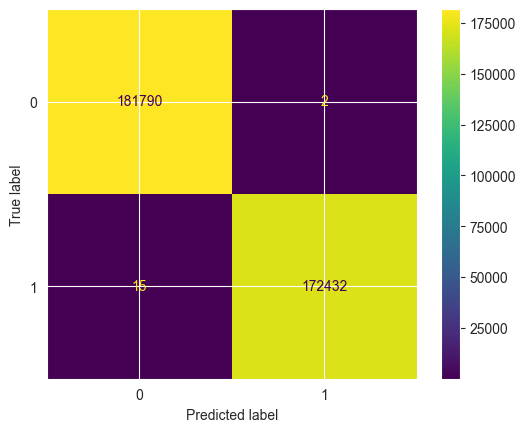

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()  # Change the colormap as desired


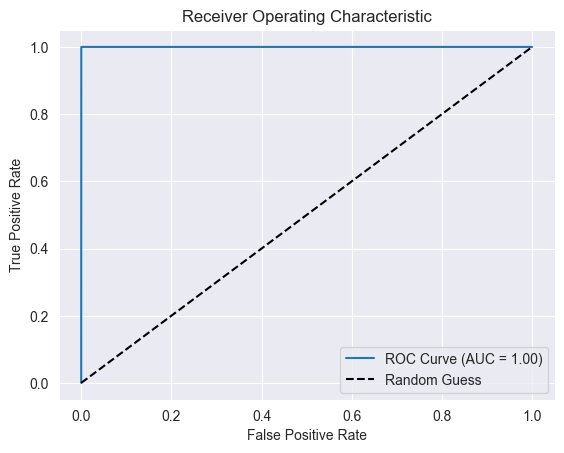

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities (for ROC curve, probabilities are required)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()